# **Pandas**
**Pandas** is a Python library for analyzing and manipulating data. More details are available on the [Pandas Home Page](https://pandas.pydata.org/).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Series

In [43]:
x = ['a','b','c','d','e']
x_= ['a','b','c','d','f']
y = [1,2,3,4,5]
z = {4:'a',2:'b',3:'c',4:'d',5:'e'}

In [45]:
a = pd.Series(data = x)

In [46]:
type(a)

pandas.core.series.Series

In [50]:
a = pd.Series(data = x,index = y)
a

1    a
2    b
3    c
4    d
5    e
dtype: object

In [48]:
b = pd.Series(z)
b

4    d
2    b
3    c
5    e
dtype: object

In [51]:
a = pd.Series(y,x)
b = pd.Series(y,x_)
c = a+b

In [52]:
c['b':'e']

b    4.0
c    6.0
d    8.0
e    NaN
dtype: float64

## 2. Data Frame

In [53]:
A = [1,2,3,4]
B = [5,6,7,8]
C = [9,0,1,2]
D = [3,4,5,6]
E = [7,8,9,0]

In [54]:
df = pd.DataFrame([A,B,C,D,E],['a','b','c','d','e'],['W','X','Y','Z'])
df

,W,X,Y,Z
a,1,2,3,4
b,5,6,7,8
c,9,0,1,2
d,3,4,5,6
e,7,8,9,0


## 3. Creating and deleting rows and column in dataframe

In [55]:
df['P'] = df['X'] + df['Z']
df

,W,X,Y,Z,P
a,1,2,3,4,6
b,5,6,7,8,14
c,9,0,1,2,2
d,3,4,5,6,10
e,7,8,9,0,8


In [56]:
df.drop('e')
df

,W,X,Y,Z,P
a,1,2,3,4,6
b,5,6,7,8,14
c,9,0,1,2,2
d,3,4,5,6,10
e,7,8,9,0,8


In [57]:
df.drop('e',inplace = True)
df

,W,X,Y,Z,P
a,1,2,3,4,6
b,5,6,7,8,14
c,9,0,1,2,2
d,3,4,5,6,10


In [58]:
df.drop('P',axis = 1)

,W,X,Y,Z
a,1,2,3,4
b,5,6,7,8
c,9,0,1,2
d,3,4,5,6


## 4. Acessing elements in dataframe

In [59]:
df['X']

a    2
b    6
c    0
d    4
Name: X, dtype: int64

In [60]:
df.loc['a']

W    1
X    2
Y    3
Z    4
P    6
Name: a, dtype: int64

In [61]:
df.iloc[0]

W    1
X    2
Y    3
Z    4
P    6
Name: a, dtype: int64

In [62]:
df.loc['a','X']

2

## 5. Conditional acessing

In [63]:
df>3

,W,X,Y,Z,P
a,False,False,False,True,True
b,True,True,True,True,True
c,True,False,False,False,False
d,False,True,True,True,True


In [65]:
df[df>3]

,W,X,Y,Z,P
a,NaN,NaN,NaN,4.0,6.0
b,5.0,6.0,7.0,8.0,14.0
c,9.0,NaN,NaN,NaN,NaN
d,NaN,4.0,5.0,6.0,10.0


In [66]:
df[df['W']>3]

,W,X,Y,Z,P
b,5,6,7,8,14
c,9,0,1,2,2


In [67]:
df[df['W']>3][['W','X']]

,W,X
b,5,6
c,9,0


In [68]:
df[(df['W']>0) & (df['Z']>2)]

,W,X,Y,Z,P
a,1,2,3,4,6
b,5,6,7,8,14
d,3,4,5,6,10


## 6. Missing data

In [69]:
d = {'a':[1,2,3,4,5],'b':[6,7,8,9,np.nan],'c':[0,1,2,np.nan,np.nan],'d':[3,4,np.nan,np.nan,np.nan],'e':[5,np.nan,np.nan,np.nan,np.nan]}

In [70]:
df = pd.DataFrame(d)
df

,a,b,c,d,e
0,1,6.0,0.0,3.0,5.0
1,2,7.0,1.0,4.0,NaN
2,3,8.0,2.0,NaN,NaN
3,4,9.0,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN


In [71]:
df.dropna(axis=0)

,a,b,c,d,e
0,1,6.0,0.0,3.0,5.0


In [72]:
df.dropna(thresh=4)

,a,b,c,d,e
0,1,6.0,0.0,3.0,5.0
1,2,7.0,1.0,4.0,NaN


In [73]:
df.fillna(1.0)

,a,b,c,d,e
0,1,6.0,0.0,3.0,5.0
1,2,7.0,1.0,4.0,1.0
2,3,8.0,2.0,1.0,1.0
3,4,9.0,1.0,1.0,1.0
4,5,1.0,1.0,1.0,1.0


In [74]:
df['b'].fillna(value=df['b'].mean())

0    6.0
1    7.0
2    8.0
3    9.0
4    7.5
Name: b, dtype: float64

In [75]:
df['c'].fillna(value=df['c'].mean())

0    0.0
1    1.0
2    2.0
3    1.0
4    1.0
Name: c, dtype: float64

## 7. Analysing data using groupby

In [76]:
p = {'items':['apple','apple','orange','orange','guns','guns','guns'], 'days':['mon','tue','wed','thu','fri','sat','sun'],'sales':[100,80,200,100,5,10,5]}

In [77]:
df = pd.DataFrame(p)

In [78]:
df

,items,days,sales
0,apple,mon,100
1,apple,tue,80
2,orange,wed,200
3,orange,thu,100
4,guns,fri,5
5,guns,sat,10
6,guns,sun,5


In [79]:
x = df.groupby('items')
x.mean() # std, sum

,sales
items,
apple,90.000000
guns,6.666667
orange,150.000000


In [ ]:
x.count() #max, min

In [80]:
x.describe().transpose()

items             apple       guns      orange
sales count    2.000000   3.000000    2.000000
      mean    90.000000   6.666667  150.000000
      std     14.142136   2.886751   70.710678
      min     80.000000   5.000000  100.000000
      25%     85.000000   5.000000  125.000000
      50%     90.000000   5.000000  150.000000
      75%     95.000000   7.500000  175.000000
      max    100.000000  10.000000  200.000000

## 8. Joining

In [81]:
x1 = {'a':[1,2,3],'b':[5,6,7]}
y1 = {'c':[3,4,5],'d':[2,3,6]}

In [82]:
x = pd.DataFrame(x1, index = ['p1','p2','p3'])
y = pd.DataFrame(y1, index = ['p1','p4','p5'])

In [83]:
x

,a,b
p1,1,5
p2,2,6
p3,3,7


In [84]:
y

,c,d
p1,3,2
p4,4,3
p5,5,6


In [85]:
x.join(y,how="right") #outer, inner, left, rihgt

,a,b,c,d
p1,1.0,5.0,3,2
p4,NaN,NaN,4,3
p5,NaN,NaN,5,6


## 9. Concatinating

In [5]:
x1 = {'a':[1,1,1,1,1], 'b':[1,1,1,1,1],'c':[1,1,1,1,1],'d':[1,1,1,1,1],'e':[1,1,1,1,1]}
x2 = {'e':[2,2,2,2,2], 'f':[2,2,2,2,2],'g':[2,2,2,2,2],'h':[2,2,2,2,2],'l':[2,2,2,2,2]}
x3 = {'a':[3,3,3,3,3], 'b':[3,3,3,3,3],'c':[3,3,3,3,3],'d':[3,3,3,3,3],'e':[3,3,3,3,3]}

In [7]:
df1 = pd.DataFrame(x1, index =[1,2,3,4,5])
df2 = pd.DataFrame(x2, index =[1,2,3,4,5])
df3 = pd.DataFrame(x3, index =[5,6,7,8,9])

In [9]:
pd.concat([df1,df2], axis=1)

,a,b,c,d,e,e,f,g,h,l
1,1,1,1,1,1,2,2,2,2,2
2,1,1,1,1,1,2,2,2,2,2
3,1,1,1,1,1,2,2,2,2,2
4,1,1,1,1,1,2,2,2,2,2
5,1,1,1,1,1,2,2,2,2,2


In [10]:
pd.concat([df1,df3], axis=0)

,a,b,c,d,e
1,1,1,1,1,1
2,1,1,1,1,1
3,1,1,1,1,1
4,1,1,1,1,1
5,1,1,1,1,1
5,3,3,3,3,3
6,3,3,3,3,3
7,3,3,3,3,3
8,3,3,3,3,3
9,3,3,3,3,3


## 10. Merging

In [29]:
df1 = pd.DataFrame({'a':[2,3,4],'b':[5,6,7],'key1':[1,2,4],'key2':[5,2,3]})
df2 = pd.DataFrame({'c':[1,2,9],'d':[5,8,9],'key1':[1,2,3],'key2':[5,2,3]})

In [30]:
pd.merge(df1,df2,how='outer', on='key1')

,a,b,key1,key2_x,c,d,key2_y
0,2.0,5.0,1,5.0,1.0,5.0,5.0
1,3.0,6.0,2,2.0,2.0,8.0,2.0
2,4.0,7.0,4,3.0,NaN,NaN,NaN
3,NaN,NaN,3,NaN,9.0,9.0,3.0


In [31]:
pd.merge(df1,df2,how='outer', on=['key1','key2'])

,a,b,key1,key2,c,d
0,2.0,5.0,1,5,1.0,5.0
1,3.0,6.0,2,2,2.0,8.0
2,4.0,7.0,4,3,NaN,NaN
3,NaN,NaN,3,3,9.0,9.0


## 11. More Operators
```python
pd.index
pd.columns

pd.apply(fun)
pd.sum()
pd.sort_values(by=)

pd.unique()
pd.nunique()
pd.value_counts()
pd.isnull()
```

In [43]:
x = pd.DataFrame({'a':[1,2,3,4,5],'b':[20,10,30,40,50]})

In [34]:
x.columns

Index(['a', 'b'], dtype='object')

In [35]:
x.index

RangeIndex(start=0, stop=5, step=1)

In [36]:
x['b'].sum()

160

In [39]:
def inc(x):
    x = x+100
    return x
x['b'].apply(inc)
x['b'].apply(lambda x:x*2)

0     40
1     40
2     60
3     80
4    100
Name: b, dtype: int64

In [44]:
x.sort_values('b')

,a,b
1,2,10
0,1,20
2,3,30
3,4,40
4,5,50


## 12. Loading data using pandas

In [3]:
a = pd.read_csv('https://raw.githubusercontent.com/dhgiang85/datascience_data/master/data/imports-85.data.txt')

In [47]:
a.head(5)

,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.60,...,130,mpfi,3.47,2.68,9.00,111,5000,21,27,13495
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
1,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
2,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
3,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
4,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250


# **Pandas Example**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
columnNames = ['symboling','normalized_losses','make','fuel_type','aspiration','num_of_doors','body_style',
               'drive_wheels','engine_location','wheel_base','length','width','height','curb_weight',
               'engine_type','num_of_cylinders','engine_size','fuel_system','bore','stroke','compression_ratio',
               'horsepower','peak_rpm','city_mpg','highway_mpg','price']
cars = pd.read_csv('https://raw.githubusercontent.com/msiddalingaiah/MachineLearning/master/Notebooks/data/imports-85.data', sep=',', names = columnNames)
print('Total number of cars: %d' % len(cars))

Total number of cars: 205


In [8]:
cars.head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [18]:
cars[['make', 'body_style']].head(5)

,make,body_style
0,alfa-romero,convertible
1,alfa-romero,convertible
2,alfa-romero,hatchback
3,audi,sedan
4,audi,sedan


In [11]:
cars[(cars.make == 'audi') & (cars['num_of_doors'] == 'four')]

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [12]:
cars.iloc[0].make

'alfa-romero'

In [13]:
cars.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [21]:
cars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object

In [16]:
cars.make.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
cars.sort_values(by='price', ascending=False).head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
44,1,?,isuzu,gas,std,two,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
45,0,?,isuzu,gas,std,four,sedan,fwd,front,94.5,...,90,2bbl,3.03,3.11,9.6,70,5400,38,43,?
129,1,?,porsche,gas,std,two,hatchback,rwd,front,98.4,...,203,mpfi,3.94,3.11,10.0,288,5750,17,28,?
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?
188,2,94,volkswagen,gas,std,four,sedan,fwd,front,97.3,...,109,mpfi,3.19,3.40,10.0,100,5500,26,32,9995


## Data Type Conversion

In order to convert the price column to a numeric type, it is necessary to select only rows that contain numeric values. It is also necessary to make a `copy` of the resulting Dataframe to avoid `SettingWithCopyWarning` which can occurr when values are assigned to a Dataframe.

In [19]:
pricedCars = cars[cars.price.str.isnumeric()].copy()
pricedCars.price = pricedCars.price.astype(float)
pricedCars.sort_values(by='price', ascending=False).head(5)

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
74,1,?,mercedes-benz,gas,std,two,hardtop,rwd,front,112.0,...,304,mpfi,3.80,3.35,8.0,184,4500,14,16,45400.0
16,0,?,bmw,gas,std,two,sedan,rwd,front,103.5,...,209,mpfi,3.62,3.39,8.0,182,5400,16,22,41315.0
73,0,?,mercedes-benz,gas,std,four,sedan,rwd,front,120.9,...,308,mpfi,3.80,3.35,8.0,184,4500,14,16,40960.0
128,3,?,porsche,gas,std,two,convertible,rwd,rear,89.5,...,194,mpfi,3.74,2.90,9.5,207,5900,17,25,37028.0
17,0,?,bmw,gas,std,four,sedan,rwd,front,110.0,...,209,mpfi,3.62,3.39,8.0,182,5400,15,20,36880.0


In [20]:
pricedCars.dtypes

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_of_doors          object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_of_cylinders      object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                float64
dtype: object

In [22]:
pricedCars.describe()

,symboling,wheel_base,length,width,height,curb_weight,engine_size,compression_ratio,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,10.164279,25.179104,30.686567,13207.129353
std,1.254802,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,4.004965,6.423220,6.815150,7947.066342
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,9.400000,30.000000,34.000000,16500.000000
max,3.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [23]:
pricedCars.groupby(['make']).max().head(5)

,symboling,normalized_losses,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
make,,,,,,,,,,,,,,,,,,,,,
alfa-romero,3,?,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,3.47,3.47,9.00,154,5000,21,27,16500.0
audi,2,?,gas,turbo,two,wagon,fwd,front,105.8,192.7,...,136,mpfi,3.19,3.40,10.00,140,5500,24,30,23875.0
bmw,2,?,gas,std,two,sedan,rwd,front,110.0,197.0,...,209,mpfi,3.62,3.39,9.00,182,5800,23,29,41315.0
chevrolet,2,98,gas,std,two,sedan,fwd,front,94.5,158.8,...,90,2bbl,3.03,3.11,9.60,70,5400,47,53,6575.0
dodge,3,148,gas,turbo,two,wagon,fwd,front,103.3,174.6,...,156,mpfi,3.60,3.90,9.41,88,5500,37,41,12964.0


## Aggregation

The groupby method can be used to group data by a column or a set of columns and apply and aggregate function, such as count, min, max, etc.

In [24]:
pricedCars.groupby(['make', 'body_style']).max().head(5)

symboling normalized_losses fuel_type aspiration  \
make        body_style                                                      
alfa-romero convertible          3                 ?       gas        std   
            hatchback            1                 ?       gas        std   
audi        sedan                2                 ?       gas      turbo   
            wagon                1                 ?       gas        std   
bmw         sedan                2                 ?       gas        std   

                        num_of_doors drive_wheels engine_location  wheel_base  \
make        body_style                                                          
alfa-romero convertible          two          rwd           front        88.6   
            hatchback            two          rwd           front        94.5   
audi        sedan                two          fwd           front       105.8   
            wagon               four          fwd           front       105.8   
bmw         sedan                two          rwd           front       110.0   

                         length  width  ...  engine_size  fuel_system  bore  \
make        body_style                  ...                                   
alfa-romero convertible   168.8   64.1  ...          130         mpfi  3.47   
            hatchback     171.2   65.5  ...          152         mpfi  2.68   
audi        sedan         192.7   71.4  ...          136         mpfi  3.19   
            wagon         192.7   71.4  ...          136         mpfi  3.19   
bmw         sedan         197.0   70.9  ...          209         mpfi  3.62   

                        stroke  compression_ratio horsepower peak_rpm  \
make        body_style                                                  
alfa-romero convertible   2.68                9.0        111     5000   
            hatchback     3.47                9.0        154     5000   
audi        sedan         3.40               10.0        140     5500   
            wagon         3.40                8.5        110     5500   
bmw         sedan         3.39                9.0        182     5800   

                        city_mpg  highway_mpg    price  
make        body_style                                  
alfa-romero convertible       21           27  16500.0  
            hatchback         19           26  16500.0  
audi        sedan             24           30  23875.0  
            wagon             19           25  18920.0  
bmw         sedan             23           29  41315.0  

[5 rows x 24 columns]

In [25]:
groups = pricedCars.groupby(['make'])

# groupDF is a DataFrame containing all rows withing a group.
for groupName, groupDF in groups:
    print(groupName, len(groupDF))

alfa-romero 3
audi 6
bmw 8
chevrolet 3
dodge 9
honda 13
isuzu 2
jaguar 3
mazda 17
mercedes-benz 8
mercury 1
mitsubishi 13
nissan 18
peugot 11
plymouth 7
porsche 4
renault 2
saab 6
subaru 12
toyota 32
volkswagen 12
volvo 11


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x04A03628>]],
      dtype=object)

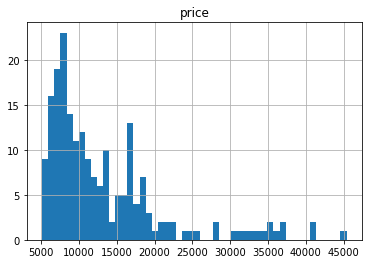

In [26]:
pricedCars.hist('price', bins=50)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x04ACCA48>]],
      dtype=object)

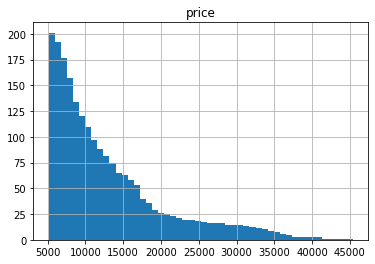

In [27]:
pricedCars.hist('price', bins=50, cumulative=-1)

In [29]:
hpPricedCars = pricedCars[pricedCars.horsepower.str.isnumeric()].copy()
hpPricedCars.horsepower = hpPricedCars.horsepower.astype(float)

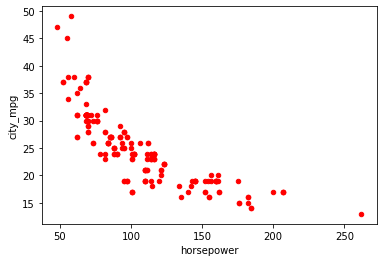

In [30]:
hpPricedCars.plot.scatter(x='horsepower', y='city_mpg', color='red')

In [31]:
priceGroups = pricedCars.groupby(['make'])['price']
means = priceGroups.mean()
std = priceGroups.std()

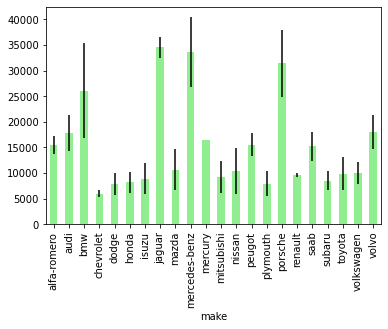

In [32]:
fig, ax = plt.subplots()
means.plot.bar(ax=ax, yerr=std, color='lightgreen')